In [72]:
import os
import shutil
import PIL.Image as Image
import pandas
import matplotlib.pyplot as plt

In [4]:
os.mkdir('./Validation')

In [6]:
for k in range(43):
    os.mkdir("./Validation/"+str(k))

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: './Validation/0'

In [23]:
data ={}

In [8]:
os.mkdir('./csv')


FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: './csv'

In [24]:
labels = os.listdir('./Training')
for label in labels:
    samples = os.listdir('./Training/'+label)
    for sample in samples:
        if sample[-3:]=='csv':
            shutil.move('./Training/'+label+'/'+sample,'./csv/'+sample)

In [25]:
labels = os.listdir('./Training')
for label in labels:
    samples = os.listdir('./Training/'+label)
    for sample in samples:
        data[label+'/'+sample] = int(label)

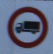

In [2]:
Image.open('./data/Test/Images/00000.ppm')

In [65]:
csv = pandas.read_csv('./data/Test/GT-final_test.csv',sep=';')

In [17]:
csv = csv.set_index('Filename')


In [38]:
csv

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
Filename,,,,,,,
00000.ppm,53,54,6,5,48,49,16
00001.ppm,42,45,5,5,36,40,1
00002.ppm,48,52,6,6,43,47,38
00003.ppm,27,29,5,5,22,24,33
00004.ppm,60,57,5,5,55,52,11
...,...,...,...,...,...,...,...
12625.ppm,42,41,5,6,37,36,12
12626.ppm,50,51,6,5,45,46,33
12627.ppm,29,29,6,6,24,24,6


In [66]:
L=[]
M=[]

In [67]:
for i in enumerate(csv['ClassId']):
    print(M)
    if i[1] not in M :
        M.append(i[-1])
        L.append(i[0])

[]
[16]
[16, 1]
[16, 1, 38]
[16, 1, 38, 33]
[16, 1, 38, 33, 11]
[16, 1, 38, 33, 11]
[16, 1, 38, 33, 11, 18]
[16, 1, 38, 33, 11, 18, 12]
[16, 1, 38, 33, 11, 18, 12, 25]
[16, 1, 38, 33, 11, 18, 12, 25, 35]
[16, 1, 38, 33, 11, 18, 12, 25, 35]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 

[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18

[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18

[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18

[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
[16, 1, 38, 33, 11, 18

In [68]:
list_file = [csv.iloc[i]['Filename'] for i in L]

<ipython-input-76-653a0436c78d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


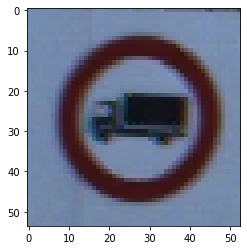

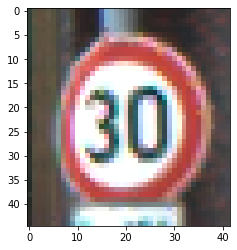

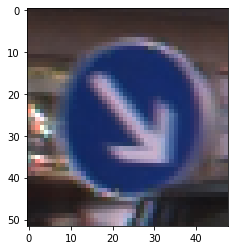

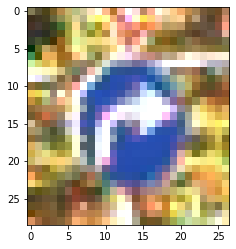

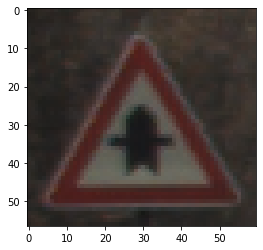

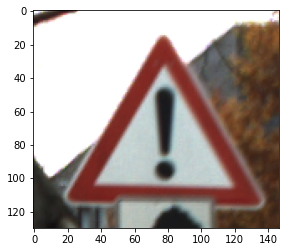

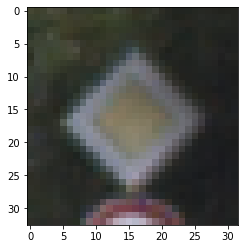

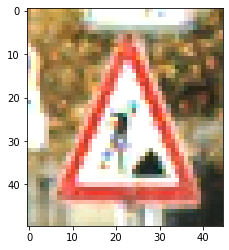

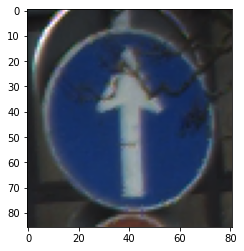

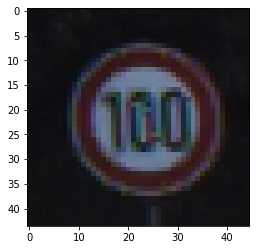

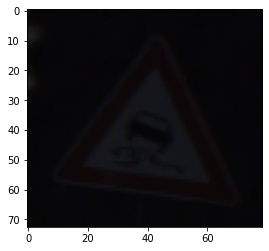

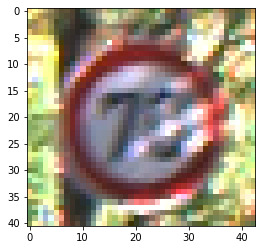

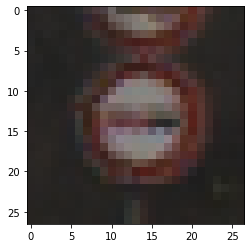

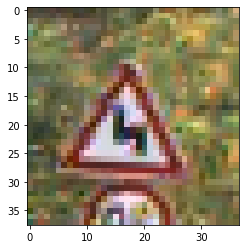

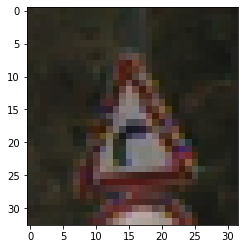

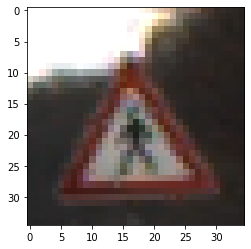

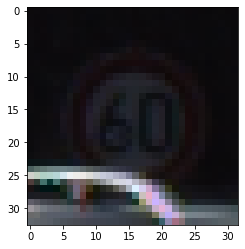

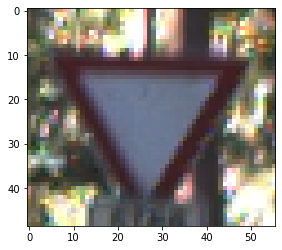

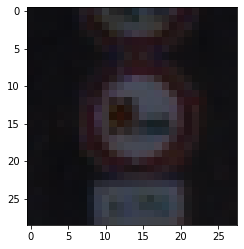

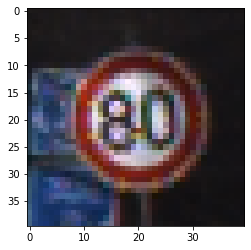

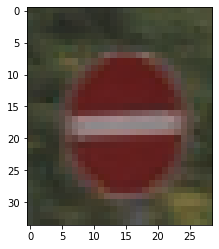

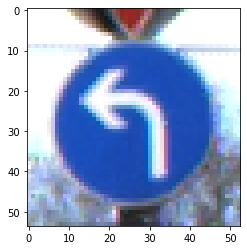

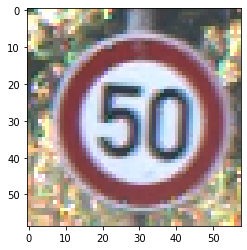

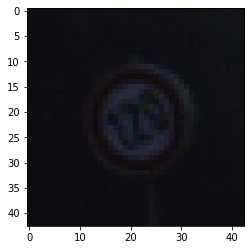

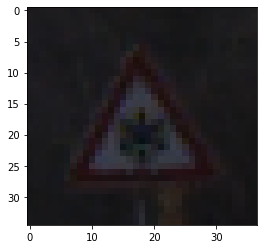

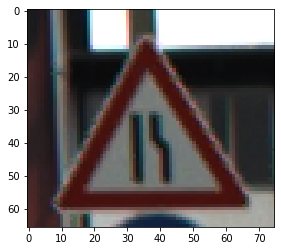

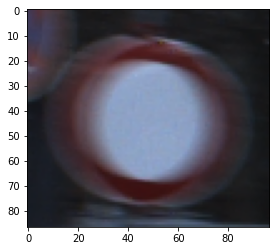

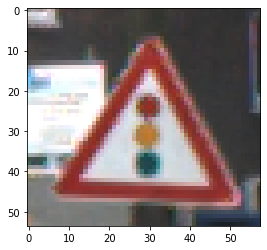

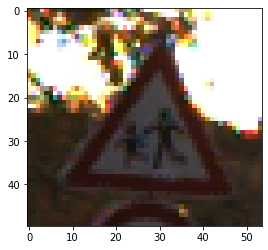

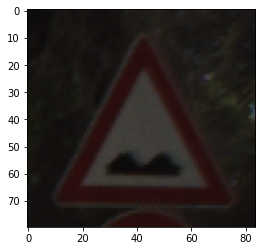

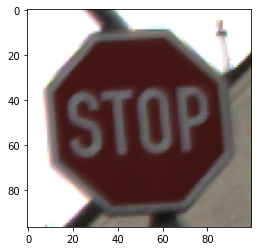

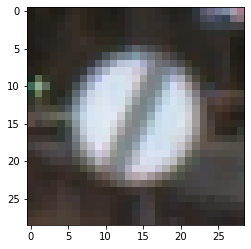

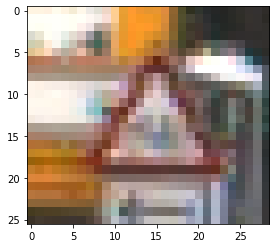

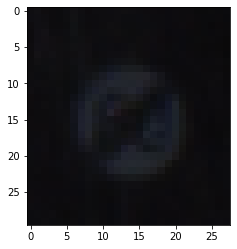

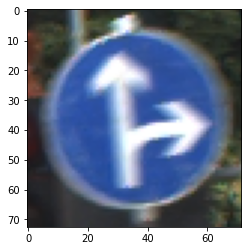

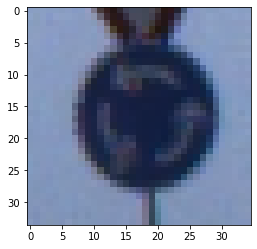

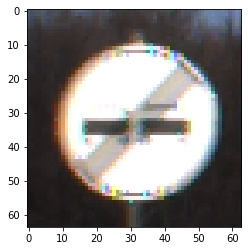

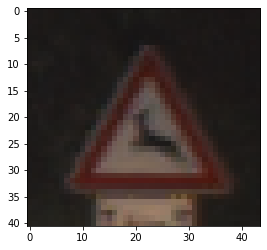

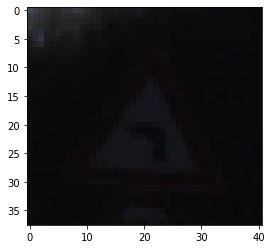

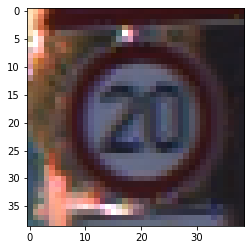

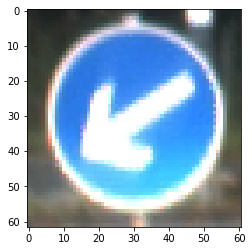

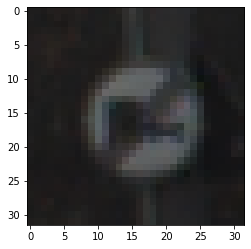

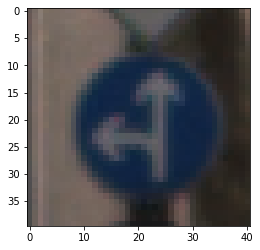

In [76]:
for i,name in enumerate(list_file):
    image = Image.open('./data/Test/Images/'+name)
    plt.figure()
    plt.imshow(image)

In [77]:
M

[16,
 1,
 38,
 33,
 11,
 18,
 12,
 25,
 35,
 7,
 23,
 4,
 9,
 21,
 20,
 27,
 3,
 13,
 10,
 5,
 17,
 34,
 2,
 8,
 30,
 24,
 15,
 26,
 28,
 22,
 14,
 32,
 29,
 6,
 36,
 40,
 41,
 31,
 19,
 0,
 39,
 42,
 37]